## Rent burden diagnostics

Sam Maurer, August 2015

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os; os.chdir('..')
import models
import datasources
import variables
import orca
import pandas as pd
import numpy as np

/Users/smmaurer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


### Execute model steps to generate fitted rents

In [3]:
# this triggers adding the unit_id to households, maybe will help with missing values?
_ = orca.get_table('residential_units')

Filling column building_type_id with value 1 (0 values)
Filling column residential_units with value 0 (0 values)
Filling column year_built with value 1966.0 (0 values)
Filling column non_residential_sqft with value 0 (0 values)
Initial unit tenure assignment: 56% owner occupied, 4% unfilled


In [4]:
orca.run([
    "neighborhood_vars",
    "rsh_simulate",
    "rrh_simulate",    
], iter_vars=[2010])

Running iteration 1 with iteration value 2010
Running step 'neighborhood_vars'
Computing accessibility variables
Computing sum_residential_units
Filling column _node_id with value 91839.0 (4 values)
Filling column shape_area with value 604.336158108 (0 values)
Filling column zone_id with value 1178 (0 values)
Computing sum_nonresidential_units
Computing ave_sqft_per_unit
Computing ave_lot_size_per_unit
Computing population
Computing poor
Computing blacks
Removed 3495 rows because they contain missing values
Computing hispanics
Removed 5989 rows because they contain missing values
Computing asians
Removed 7970 rows because they contain missing values
Computing renters
Computing sfdu
Computing ave_hhsize
Computing jobs
Computing ave_income
       sum_residential_units  sum_nonresidential_units  ave_sqft_per_unit  \
count          226060.000000             226060.000000      226060.000000   
mean                5.959528                  5.270322           7.233096   
std                 1

### Rent burden diagnostics

`rent_burden` is a column that's added to the `households` table (in `variables.py`), calculated by dividing fitted yearly rent by PUMS household income. If either component is missing, rent burden is set to zero. 

Rent burden is computed even if a household is not renting, so when you're using it, restrict the population to rental households if necessary.

Note that `unit_residential_rent` is a price per square foot, so the rent burden calculation also requires the `sqft_per_unit` column from the `buildings` table.

In [5]:
u = orca.get_table("residential_units")
u = u.to_frame()

In [6]:
# Fitted rent per square foot
u.unit_residential_rent.describe()

count    2785789.000000
mean           2.286896
std            0.653378
min            0.529291
25%            1.851349
50%            2.154488
75%            2.601086
max           11.155477
Name: unit_residential_rent, dtype: float64

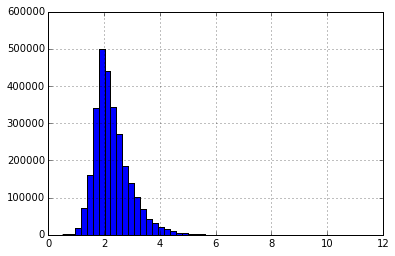

In [7]:
u.unit_residential_rent.hist(bins=50)

In [8]:
u.unit_residential_rent.isnull().sum()

0

In [9]:
b = orca.get_table("buildings")
b = b.to_frame()

In [10]:
# Unit sizes
b.sqft_per_unit.describe()

count    1841288.000000
mean        1825.815012
std         1052.321849
min          400.000000
25%         1200.000000
50%         1582.000000
75%         2115.000000
max         6000.000000
Name: sqft_per_unit, dtype: float64

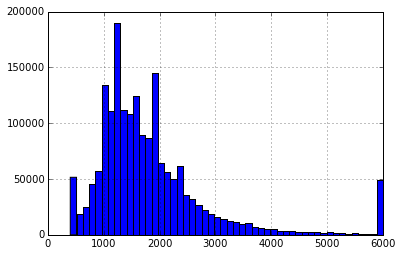

In [11]:
b.sqft_per_unit.hist(bins=50)

In [12]:
b.sqft_per_unit.isnull().sum()

0

In [13]:
h = orca.get_table("households")
h = h.to_frame()

In [14]:
# Household income
h.income.describe()

count    2732722.000000
mean       77670.162133
std        81405.085003
min       -20000.000000
25%        26500.000000
50%        58000.000000
75%       100000.000000
max      1968504.000000
Name: income, dtype: float64

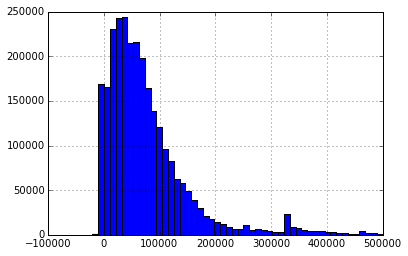

In [15]:
h.income[h.income < 500000].hist(bins=50)
# households with negative income are set to zero rent burden

In [16]:
# Monthly rent 
h.monthly_rent.describe()

count    2732722.000000
mean        2718.115226
std         3025.888654
min            0.000000
25%            0.000000
50%         2383.208172
75%         4093.646544
max        58337.534709
Name: monthly_rent, dtype: float64

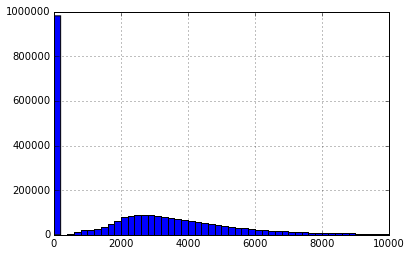

In [17]:
h.monthly_rent[h.monthly_rent < 10000].hist(bins=50)

In [25]:
len(h.monthly_rent[h.monthly_rent == 0])

980926

In [18]:
# Rent burden
h.rent_burden.describe()

count    2732722.000000
mean           1.969861
std           83.576140
min            0.000000
25%            0.000000
50%            0.288808
75%            0.933275
max        49771.459249
Name: rent_burden, dtype: float64

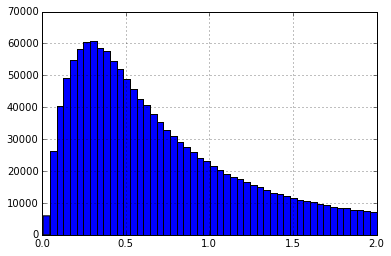

In [19]:
h.rent_burden[(h.rent_burden > 0) & (h.rent_burden < 2)].hist(bins=50)

In [22]:
sum(h.rent_burden[(h.rent_burden > 0) & (h.rent_burden < 10)])

2049789.9885571667